In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
sns.set()

In [2]:
client = bigquery.Client()

query="""
-- join gdp, inflation, unemployment table
select a.date as DATE, a.cpi as CPI, b.unemployment AS UNEMPLOYMENT, c.GDP from 
(select date, cpi from goldenfleece.final_task.target_cpi_all_items) a
inner join (select date, unemployment from goldenfleece.final_task.target_unemployment) b
on a.date = b.date
inner join (select DATE, GDP from goldenfleece.final_task.monthly_gdp_lag) c
on b.date = c.date
order by a.date
"""
target_df = client.query(query).to_dataframe()
target_df.head()

,DATE,CPI,UNEMPLOYMENT,GDP
0,2009-01-01,84.9,6.7,-2.0
1,2009-02-01,85.6,7.1,-1.5
2,2009-03-01,85.8,7.3,-1.6
3,2009-04-01,86.0,7.6,-1.1
4,2009-05-01,86.4,7.8,-1.0


In [3]:
target_df = target_df.astype({"DATE":"datetime64"})
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          140 non-null    datetime64[ns]
 1   CPI           140 non-null    float64       
 2   UNEMPLOYMENT  140 non-null    float64       
 3   GDP           140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.5 KB


In [4]:
from cross_validate import cross_validate, build_design_matrix, evaluate_features

### Target: 3M on 3M GDP Change

In [5]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

rmse_list = []
design_df_list = []
result_df_list = []
for horizon in [1,2,3,4,5,6]:
    design_df, result_df = evaluate_features(
        target_df[["DATE", "GDP"]],
        date_col="DATE",
        var_col="GDP",
        horizon=horizon,
        estimator=lr,
        window=36,
        period=1,
        return_model=True,
        start_date="2009-07-01",
        end_date="2020-03-01",
    )
    rmse = (((result_df["pred"] - result_df["actual"]) ** 2).mean()) ** 0.5
    rmse_list.append(rmse)
    design_df_list.append(design_df)
    result_df_list.append(result_df)
    print(f"Average RMSE over {len(result_df)} predictions for {horizon}-month horizon: {rmse:.3f}")

print(f"\nAverage RMSE across different horizons: {np.array(rmse_list).mean():.3f}")

Average RMSE over 90 predictions for 1-month horizon: 0.380
Average RMSE over 88 predictions for 2-month horizon: 0.421
Average RMSE over 86 predictions for 3-month horizon: 0.416
Average RMSE over 84 predictions for 4-month horizon: 0.422
Average RMSE over 82 predictions for 5-month horizon: 0.411
Average RMSE over 80 predictions for 6-month horizon: 0.409

Average RMSE across different horizons: 0.410


<AxesSubplot:xlabel='date', ylabel='3M on 3M GDP Change'>

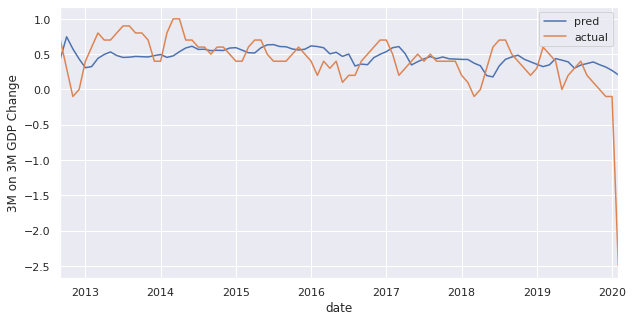

In [6]:
# check 1-month horizon plot
result_df = result_df_list[0]
result_df[["pred", "actual", "date"]].set_index("date").plot(figsize=(10,5), ylabel="3M on 3M GDP Change")

### Target: Inflation

In [7]:
rmse_list = []
design_df_list = []
result_df_list = []
for horizon in [1,2,3,4,5,6]:
    design_df, result_df = evaluate_features(
        target_df[["DATE", "CPI"]],
        date_col="DATE",
        var_col="CPI",
        horizon=horizon,
        estimator=lr,
        window=36,
        period=1,
        return_model=True,
        start_date="2009-07-01",
        end_date="2020-03-01",
    )
    rmse = (((result_df["pred"] - result_df["actual"]) ** 2).mean()) ** 0.5
    rmse_list.append(rmse)
    design_df_list.append(design_df)
    result_df_list.append(result_df)
    print(f"Average RMSE over {len(result_df)} predictions for {horizon}-month horizon: {rmse:.3f}")

print(f"\nAverage RMSE across different horizons: {np.array(rmse_list).mean():.3f}")

Average RMSE over 90 predictions for 1-month horizon: 0.451
Average RMSE over 88 predictions for 2-month horizon: 0.569
Average RMSE over 86 predictions for 3-month horizon: 0.685
Average RMSE over 84 predictions for 4-month horizon: 0.837
Average RMSE over 82 predictions for 5-month horizon: 0.975
Average RMSE over 80 predictions for 6-month horizon: 1.190

Average RMSE across different horizons: 0.785


<AxesSubplot:xlabel='date', ylabel='CPI'>

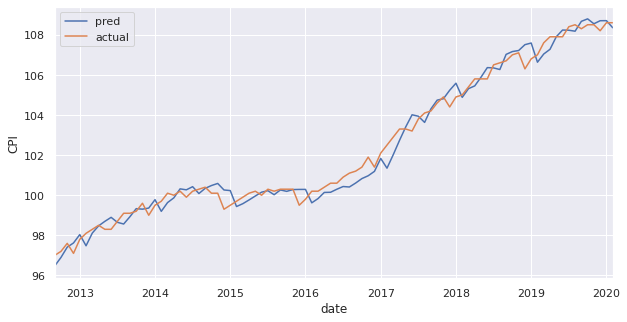

In [8]:
# check 1-month horizon plot
result_df = result_df_list[0]
result_df[["pred", "actual", "date"]].set_index("date").plot(figsize=(10,5), ylabel="CPI")

### Target: Unemployment

In [9]:
rmse_list = []
design_df_list = []
result_df_list = []
for horizon in [1,2,3,4,5,6]:
    design_df, result_df = evaluate_features(
        target_df[["DATE", "UNEMPLOYMENT"]],
        date_col="DATE",
        var_col="UNEMPLOYMENT",
        horizon=horizon,
        estimator=lr,
        window=36,
        period=1,
        return_model=True,
        start_date="2009-07-01",
        end_date="2020-03-01",
    )
    rmse = (((result_df["pred"] - result_df["actual"]) ** 2).mean()) ** 0.5
    rmse_list.append(rmse)
    design_df_list.append(design_df)
    result_df_list.append(result_df)
    print(f"Average RMSE over {len(result_df)} predictions for {horizon}-month horizon: {rmse:.3f}")

print(f"\nAverage RMSE across different horizons: {np.array(rmse_list).mean():.3f}")

Average RMSE over 90 predictions for 1-month horizon: 0.146
Average RMSE over 88 predictions for 2-month horizon: 0.212
Average RMSE over 86 predictions for 3-month horizon: 0.296
Average RMSE over 84 predictions for 4-month horizon: 0.392
Average RMSE over 82 predictions for 5-month horizon: 0.499
Average RMSE over 80 predictions for 6-month horizon: 0.607

Average RMSE across different horizons: 0.359


<AxesSubplot:xlabel='date', ylabel='CPI'>

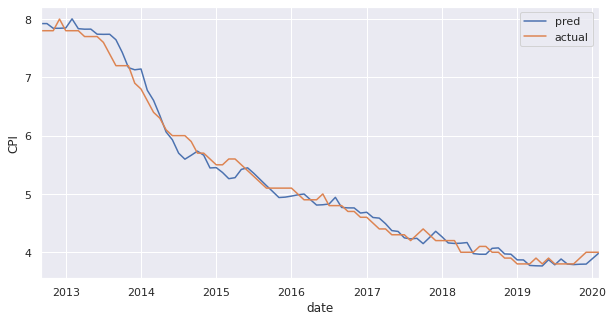

In [10]:
# check 1-month horizon plot
result_df = result_df_list[0]
result_df[["pred", "actual", "date"]].set_index("date").plot(figsize=(10,5), ylabel="CPI")